<a href="https://colab.research.google.com/github/GOVINDFROMINDIA/AML-331-Python-and-Machine-Learning-Lab/blob/main/_7.Multiple-LInear-Regression/_7.Multiple-linear-Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset is : 
      y  x1  x2
0  140  60  22
1  155  62  25
2  159  67  24
3  179  70  20
4  198  68  26
5  125  75  19
6  135  65  21
0    60
1    62
2    67
3    70
4    68
5    75
6    65
Name: x1, dtype: int64 0    22
1    25
2    24
3    20
4    26
5    19
6    21
Name: x2, dtype: int64
X is: 
 [[1, 60, 22], [1, 62, 25], [1, 67, 24], [1, 70, 20], [1, 68, 26], [1, 75, 19], [1, 65, 21]]
Y is: 
 [[140]
 [155]
 [159]
 [179]
 [198]
 [125]
 [135]]
B matrix is [[-152.96538654]
 [   2.06470191]
 [   7.62765551]]


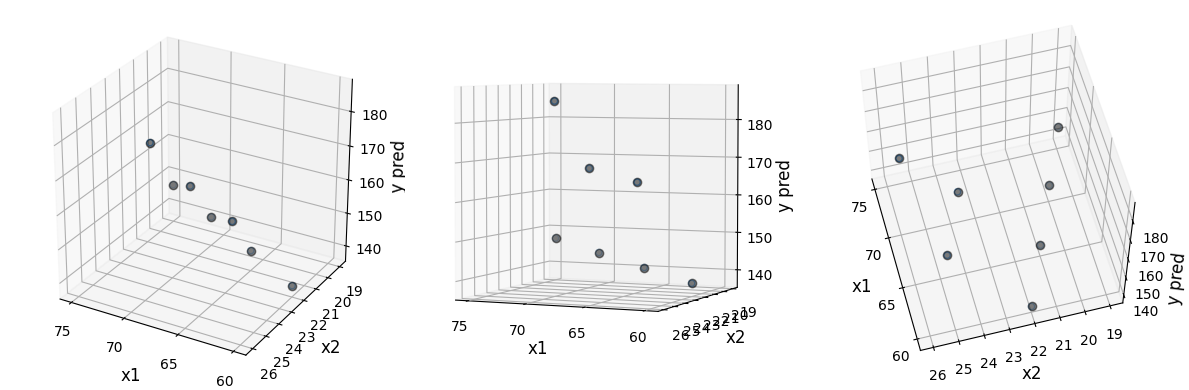

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def beta(x,y):
  xt=np.transpose(x)
  xt_x=np.matmul(xt,x)
  inv=np.linalg.inv(xt_x)
  inv_xt=np.matmul(inv,xt)
  b=np.matmul(inv_xt,y)
  b=np.array(b)
  print("B matrix is",b)
  ypred=[]
  for i in range(len(x)):
    pred=b[0][0]+b[1][0]*x[i][1]+b[2][0]*x[i][2]
    ypred.append(pred)
  return ypred
  '''
  print("Ypred is",ypred)

  fig=plt.figure(figsize=(11,11))
  ax=fig.add_subplot(111,projection='3d')
  ax.scatter(dataset['x1'],dataset['x2'],dataset['y'],c='indigo',marker='*')
  ax.plot3D(dataset['x1'],dataset['x2'],ypred,c='orange')
  plt.show
  '''

dataset=pd.read_csv("datafile.csv")
print("Dataset is : \n",dataset)
X=dataset["x1"]
Y=dataset["x2"]
y=dataset.iloc[:,0:1].values
x=dataset.iloc[:,1:3].values

print(X,Y)
list=[]
for i in range(len(x)):
  row=[]
  row.append(1)
  for j in (x[i]):
    row.append(j)
  list.append(row)
x=list
print("X is: \n",x)
print("Y is: \n",y)
ypred=beta(x,y)
plt.style.use('default')
fig=plt.figure(figsize=(12,4))
ax1=fig.add_subplot(131,projection='3d')
ax2=fig.add_subplot(132,projection='3d')
ax3=fig.add_subplot(133,projection='3d')
axes=[ax1,ax2,ax3]

for ax in axes:
  ax.plot(X,Y,ypred,color='k',zorder=15,linestyle='none',marker='o',alpha=.5)
  ax.scatter(X,Y,ypred,facecolor=(0,0,0,0),s=20,edgecolor='#70b3f0')
  ax.set_xlabel('x1',fontsize=12)
  ax.set_ylabel('x2',fontsize=12)
  ax.set_zlabel('y pred',fontsize=12)
  ax.locator_params(nbins=4,axis='x')
  ax.locator_params(nbins=5,axis='x')

ax1.view_init(elev=28,azim=120)
ax2.view_init(elev=4,azim=114)
ax3.view_init(elev=60,azim=165)

fig.tight_layout()